In [28]:
import xarray as xr
import matplotlib.pyplot as plt
# from snakemake.io import 
import pandas as pd
import numpy as np
import matplotlib.transforms as mtransforms
%matplotlib inline

In [102]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    psize= snakemake.wildcards.psize
    kind = snakemake.wildcards.kind
else:
    path = '../../../'
    to_file= False
    psize='2micron'
    kind='wetdep'

In [96]:
def plot_deposition_histogram(psize,kind,locs=['SHAPOTOU', 'BADOE', 'SACOL','LUOCHUAN','LANTIAN','LINGTAI']):
    fig,axes = plt.subplot_mosaic([['a)','b)','c)'],['d)','e)','f)']], constrained_layout=True)
    for loc,axs in zip(locs,axes):
#         if loc == 'B'
        dfs = []
        for year in range(1999,2019):
            dfs.append( pd.read_csv(path+f'results/model_results/intermediate_results/timeseries/{kind}/{kind}.{loc}.{psize}.Day.{year}.csv', index_col=0))

        df = pd.concat(dfs)

        df.index = pd.to_datetime(df.index)

        df_early_spring = []
        for year in range(1999,2019):
            df_early_spring.append(df[f'{year}-03-06':f'{year}-04-17'])

        df_late_spring = []
        for year in range(1999,2019):
            df_late_spring.append(df[f'{year}-04-17':f'{year}-05-31'])


        df_early_spring = pd.concat(df_early_spring)
        df_late_spring = pd.concat(df_late_spring)


        logbins = np.logspace(np.log10(1e-5),np.log10(0.1),10)
        df_late_spring.where(df_late_spring>1e-5).hist(bins=logbins,ax=axes[axs], label='Late spring')
        df_early_spring.where(df_early_spring>1e-5).hist(bins=logbins,ax=axes[axs],alpha=0.7, label='Early spring')
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        axes[axs].semilogx()
#         axes[axs].set_ylim(0,200)
        axes[axs].text(0.0, 1.0, axs, transform=axes[axs].transAxes + trans,
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
        axes[axs].set_title(loc)
        
    h,l =axes[axs].get_legend_handles_labels()
    axes['a)'].set_ylabel('# events')
    axes['d)'].set_ylabel('# events')
    axes['e)'].set_xlabel('Dust deposited per day (g/$m^2$)')
    fig.legend(h, l,bbox_to_anchor=(0.3,0.,0.25,0.01 ),ncol=2)

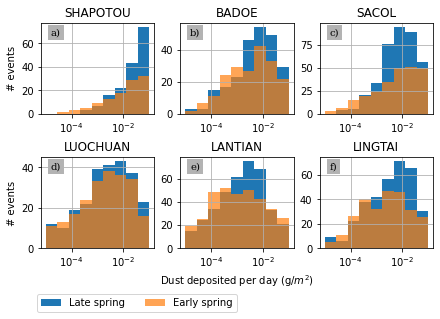

In [103]:
plot_deposition_histogram(psize, kind)
if to_file:
    plt.savefig(snakemake.output.outpath, bbox_inches='tight')